In [103]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.linear_model import Lasso as lasso

In [69]:
df = pd.read_csv('/Users/mattbubb/Spring_2021/DS_340W/Sports-Betting-340W/Data/finalDataFrame.csv')

In [70]:
df.columns

Index(['Unnamed: 0', 'team1_game_date', 'book_id', 'a_team_id', 'home_team_id',
       'home_w_pct', 'home_fg_pct', 'home_fg3_pct', 'home_ft_pct', 'home_reb',
       'home_ast', 'home_stl', 'home_blk', 'home_tov', 'home_pts',
       'away_team_id', 'away_w_pct', 'away_fg_pct', 'away_fg3_pct',
       'away_ft_pct', 'away_reb', 'away_ast', 'away_stl', 'away_blk',
       'away_tov', 'away_pts', 'game_number', 'homeTeamPrice',
       'awayTeamPrice'],
      dtype='object')

In [72]:
df = df.drop(['Unnamed: 0'], axis = 1)
df

,team1_game_date,book_id,a_team_id,home_team_id,home_w_pct,home_fg_pct,home_fg3_pct,home_ft_pct,home_reb,home_ast,...,away_ft_pct,away_reb,away_ast,away_stl,away_blk,away_tov,away_pts,game_number,homeTeamPrice,awayTeamPrice
0,2018-06-06,238,1610612739,1.610613e+09,0.572719,0.473792,0.366729,1.0,41.864583,22.614583,...,0.989474,43.789474,28.357895,8.126316,6.884211,14.263158,112.094737,96.0,150.0,-166.0
1,2018-06-06,93,1610612739,1.610613e+09,0.572719,0.473792,0.366729,1.0,41.864583,22.614583,...,0.989474,43.789474,28.357895,8.126316,6.884211,14.263158,112.094737,96.0,155.0,-180.0
2,2018-06-06,1096,1610612739,1.610613e+09,0.572719,0.473792,0.366729,1.0,41.864583,22.614583,...,0.989474,43.789474,28.357895,8.126316,6.884211,14.263158,112.094737,96.0,147.0,-167.0
3,2018-06-06,999996,1610612739,1.610613e+09,0.572719,0.473792,0.366729,1.0,41.864583,22.614583,...,0.989474,43.789474,28.357895,8.126316,6.884211,14.263158,112.094737,96.0,150.0,-170.0
4,2018-06-06,169,1610612739,1.610613e+09,0.572719,0.473792,0.366729,1.0,41.864583,22.614583,...,0.989474,43.789474,28.357895,8.126316,6.884211,14.263158,112.094737,96.0,150.0,-170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123618,2006-11-01,93,1610612759,1.610613e+09,1.000000,0.474000,0.421000,0.0,50.000000,24.000000,...,1.000000,52.000000,28.000000,2.000000,5.000000,23.000000,102.000000,2.0,200.0,-240.0
123619,2006-11-01,999996,1610612759,1.610613e+09,1.000000,0.474000,0.421000,0.0,50.000000,24.000000,...,1.000000,52.000000,28.000000,2.000000,5.000000,23.000000,102.000000,2.0,195.0,-235.0
123620,2006-11-01,238,1610612744,1.610613e+09,0.000000,0.415000,0.158000,1.0,46.000000,18.000000,...,1.000000,44.000000,12.000000,5.000000,3.000000,14.000000,104.000000,2.0,-440.0,400.0
123621,2006-11-01,19,1610612744,1.610613e+09,0.000000,0.415000,0.158000,1.0,46.000000,18.000000,...,1.000000,44.000000,12.000000,5.000000,3.000000,14.000000,104.000000,2.0,-475.0,380.0


In [73]:
df['diff_reb'] = df['home_reb'] - df['away_reb']
df['diff_fg_pct'] = df['home_fg_pct'] - df['away_fg_pct']
df['diff_fg3_pct'] = df['home_fg_pct'] - df['away_fg_pct']
df['diff_w_pct'] = df['home_w_pct'] - df['away_w_pct']
df['diff_pts'] = df['home_pts'] - df['away_pts']
df['diff_ast'] = df['home_ast'] - df['away_ast']
df['diff_pts'] = df['home_pts'] - df['away_pts']
df['diff_tov'] = df['home_tov'] - df['away_tov']

In [75]:
X = df[['home_w_pct', 'home_fg_pct',
        'home_fg3_pct', 'home_ft_pct', 'home_reb', 'home_ast', 'home_stl',
       'home_blk', 'home_tov', 'home_pts', 'away_team_id', 'away_w_pct',
       'away_fg_pct', 'away_fg3_pct', 'away_ft_pct', 'away_reb', 'away_ast',
       'away_stl', 'away_blk', 'away_tov', 'away_pts', 'diff_reb', 
       'diff_fg_pct', 'diff_fg3_pct',
       'diff_w_pct', 'diff_pts', 'diff_ast', 'diff_tov']]
yHome = df['homeTeamPrice']
yAway = df['awayTeamPrice']

## Parson's Correlation on Features

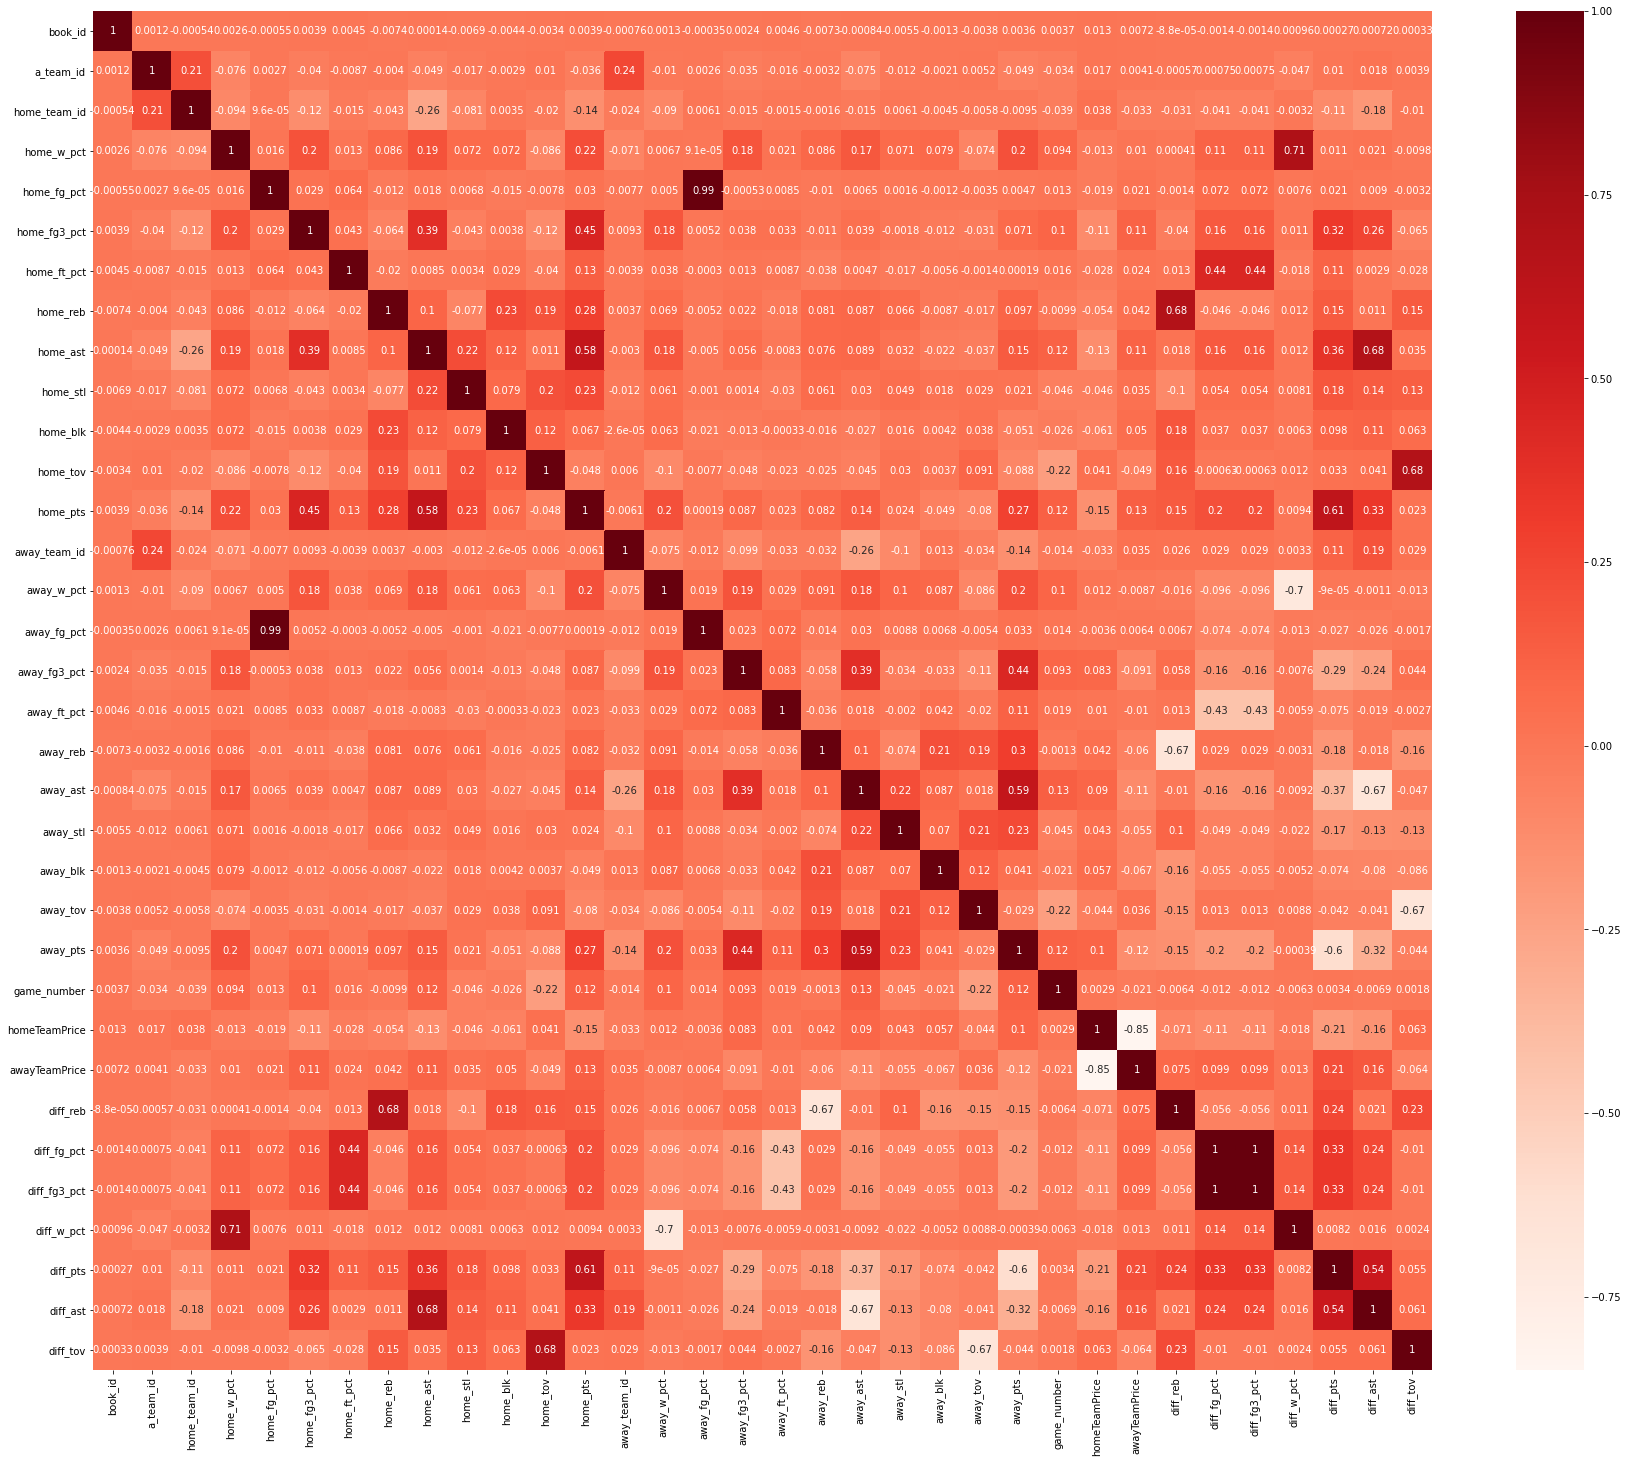

In [76]:
plt.figure(figsize=(30,25))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## Hometeam Price Feature Investigation

In [77]:
#Correlation with home team price variable
cor_target_home = abs(cor["homeTeamPrice"])
cor_target_home.sort_values(ascending=False)

homeTeamPrice    1.000000
awayTeamPrice    0.849881
diff_pts         0.206100
diff_ast         0.159403
home_pts         0.145979
home_ast         0.125105
home_fg3_pct     0.114371
diff_fg3_pct     0.107459
diff_fg_pct      0.107459
away_pts         0.102750
away_ast         0.089771
away_fg3_pct     0.082988
diff_reb         0.071150
diff_tov         0.062819
home_blk         0.061246
away_blk         0.056887
home_reb         0.054240
home_stl         0.046346
away_tov         0.043523
away_stl         0.042768
away_reb         0.042198
home_tov         0.041205
home_team_id     0.037942
away_team_id     0.032778
home_ft_pct      0.028118
home_fg_pct      0.019250
diff_w_pct       0.017781
a_team_id        0.016779
home_w_pct       0.013415
book_id          0.012718
away_w_pct       0.011646
away_ft_pct      0.010473
away_fg_pct      0.003568
game_number      0.002924
Name: homeTeamPrice, dtype: float64

In [78]:
reg = LassoCV()
reg.fit(X, yHome)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,yHome))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.775741
Best score using built-in LassoCV: 0.059078


In [79]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 16 variables and eliminated the other 12 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

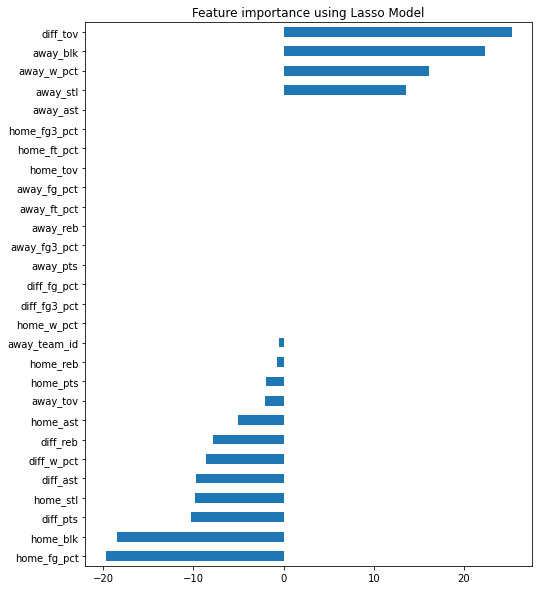

In [80]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

## Awayteam Price Investigation

In [81]:
#Correlation with away team price variable
cor_target_away = abs(cor["awayTeamPrice"])
cor_target_away.sort_values(ascending=False)

awayTeamPrice    1.000000
homeTeamPrice    0.849881
diff_pts         0.206211
diff_ast         0.163785
home_pts         0.127488
away_pts         0.121552
away_ast         0.110718
home_ast         0.110318
home_fg3_pct     0.108271
diff_fg3_pct     0.099430
diff_fg_pct      0.099430
away_fg3_pct     0.090614
diff_reb         0.075413
away_blk         0.066791
diff_tov         0.063529
away_reb         0.060184
away_stl         0.055066
home_blk         0.050353
home_tov         0.049409
home_reb         0.042148
away_tov         0.036220
away_team_id     0.035454
home_stl         0.034995
home_team_id     0.032694
home_ft_pct      0.023536
game_number      0.021173
home_fg_pct      0.020905
diff_w_pct       0.013489
home_w_pct       0.010335
away_ft_pct      0.010189
away_w_pct       0.008676
book_id          0.007226
away_fg_pct      0.006394
a_team_id        0.004149
Name: awayTeamPrice, dtype: float64

In [82]:
reg = LassoCV()
reg.fit(X, yAway)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,yAway))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.802794
Best score using built-in LassoCV: 0.060090


In [83]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 15 variables and eliminated the other 13 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

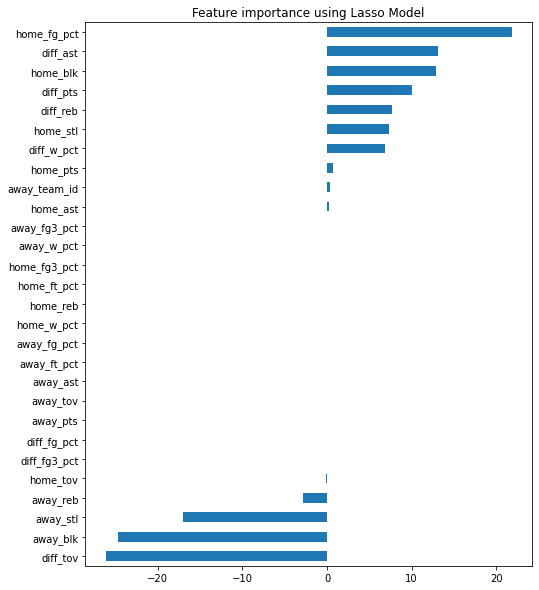

In [84]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

## Back to modeling

In [86]:
X = df[['home_blk','home_stl','diff_pts','diff_ast','home_ast','away_reb','away_blk']]
y = df[['homeTeamPrice','awayTeamPrice']]

In [87]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.3, random_state=4)

In [115]:
regr_multirf = MultiOutputRegressor(RandomForestRegressor(n_estimators=100,
                                                          max_depth=30,
                                                          random_state=0))
regr_multirf.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=30,
                                                     random_state=0))

In [116]:
y_multirf = regr_multirf.predict(X_test)

In [117]:
regr_multirf.score(X_test, y_test)

0.7719625786844235

In [118]:
y_multirf = pd.DataFrame(y_multirf, columns = ['homeTeamPrice','awayTeamPrice'])

## Performance Metrics

In [119]:
homeRMSE = math.sqrt(mean_squared_error(y_multirf['homeTeamPrice'], y_test['homeTeamPrice']))

In [120]:
homeRMSE

263.2793812450957

In [121]:
y_multirf['homeTeamPrice'][:5]

0     129.288820
1     105.850083
2     -65.860996
3   -1281.692857
4    -179.674118
Name: homeTeamPrice, dtype: float64

In [122]:
y_test['homeTeamPrice'][:5]

42670      162.0
115437    -330.0
53767     -130.0
51441    -1400.0
17301     -167.0
Name: homeTeamPrice, dtype: float64

In [123]:
awayRMSE = math.sqrt(mean_squared_error(y_multirf['awayTeamPrice'], y_test['awayTeamPrice']))

In [124]:
awayRMSE

239.1024144873754

In [125]:
y_multirf['awayTeamPrice'][:5]

0   -181.456981
1   -204.993819
2     63.357929
3    822.455714
4    156.891667
Name: awayTeamPrice, dtype: float64

In [126]:
y_test['awayTeamPrice'][:5]

42670    -180.0
115437    280.0
53767     110.0
51441     750.0
17301     151.0
Name: awayTeamPrice, dtype: float64